In [1]:
#DEPENDENCIES & INITIALISATIONS
from IPython.display import HTML #For embedding videos
import math #Basic math functionality
import numpy as np #Numpy for working with arrays
import matplotlib.pyplot as plt #Plotting functionality 
#HTML('<center><iframe width="560" height="315" src="#" frameborder="0" allowfullscreen></iframe></center>')
print("- Author: Dr SPCarroll, Sept 2021")

- Author: Dr SPCarroll, Sept 2021


# Week 11: Nonuniform Torsion, Stresses and Strains
Reference: Chapter 3 of *Mechanics of Materials*, Gere and Goodno

## Question 1

Consider the stepped shaft shown below. The material has a shear modulus $G=76\:kN/mm^2$. The parameters shown have the following values:
- $d_1=58\:mm$
- $d_2= 45\:mm$
- $L_1=760\:mm$
- $L_2=510\:mm$
- $T_1 = 2300\:Nm$
- $T_2 = 900\:Nm$


- (a) determine the maximum shear stress in the shaft $\tau_{\text{max}}$
- (b) the angle of twist in degrees at $C$

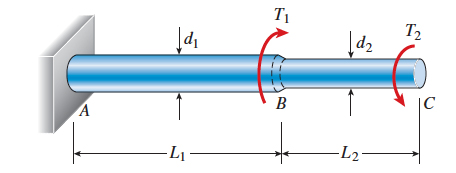

**Solution 1**

(a) We must evaluate the shear stress between $A$ and $B$, then between $B$ and $C$. The torque in each region is evaluated by making a cut and evaluating moment equilibrium. The shear stress is then determined using,

\begin{equation}
\tau_{\text{max}}= \frac{Tr}{I_P}
\end{equation}

In [11]:
# Region between A and B
T_AB = 1400 #(Nm)
d1 = 0.058 #(m)
IP_AB = math.pi*(d1**4)/32
tau_max_AB = T_AB*(d1/2)/IP_AB
print('The maximum shear stress between A and B is {one} N/mm^2'.format(one=round(tau_max_AB*10**-6,2)))

#Region between B and C
T_BC = 900 #(Nm)
d2 = 0.045 #(m)
IP_BC = math.pi*(d2**4)/32
tau_max_BC = T_BC*(d2/2)/IP_BC
print('The maximum shear stress between B and C is {one} N/mm^2'.format(one=round(tau_max_BC*10**-6,2)))

#Test for maximum
if tau_max_AB>tau_max_BC:
    print('1(a) The maximum shear stress occurs between A and B and has a magnitude of {one} N/mm^2'.format(one=round(tau_max_AB*10**-6,2)))
else:
    print('1(a) The maximum shear stress occurs between B and C and has a magnitude of {one} N/mm^2'.format(one=round(tau_max_BC*10**-6,2)))    
   

The maximum shear stress between A and B is 36.54 N/mm^2
The maximum shear stress between B and C is 50.3 N/mm^2
1(a) The maximum shear stress occurs between B and C and has a magnitude of 50.3 N/mm^2
1.1109943968118214e-06


(b) To determine the angle of twist at C, we evaluate the angles in each region individually using, 

\begin{equation}
\phi=\theta L = \frac{TL}{GI_P}
\end{equation}

and obtain the algebraic sum,

\begin{equation}
\phi_{\text{total}} = \sum_{i=1}^n \phi_i
\end{equation}


In [18]:
# Region between A and B
G = 76*10**9 #(N/m^2)
L1 = 0.76 #(m)
phi_AB = (T_AB*L1)/(G*IP_AB)

# Region between B and C
L2 = 0.51 #(m)
phi_BC = (T_BC*L2)/(G*IP_BC)

print(T_AB) 

1400


Note that the torque between A and B will cause a clockwise rotation when viewed from end C. The torque between B and C will cause a counterclockwise rotation from the same viewpoint. If we assume the counter-clockwise rotation is positive, we can combine the angles of rotation as follows...

In [4]:
phi_total = -phi_AB+phi_BC
phi_total_deg = phi_total*(180/math.pi)
print('1(b) The angle of rotation at C is {one} degrees'.format(one=round(phi_total_deg,2)))

1(b) The angle of rotation at C is 0.14 degrees


## Question 2

Consider the stepped shaft shown below. The material has a shear modulus of $80\:kN/mm^2$. The parameter shown have the following values:

- $d_1 = 50\:mm$
- $d_2 = 40\:mm$
- $L_1 = 1.25\:m$
- $L_2 = 1\:m$

The maximum allowable shear stress is $30\:N/mm^2$ and the angle of twist between ends cannot exceed $1.5^\circ$. Determine the maximum allowable torque that will satisfy these conditions.

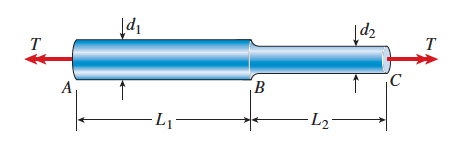

**Solution 2**

First solve for maximum torque based on $\tau_{\text{max, all}} = 30\:N/mm^2$

In [5]:
tau_max_all = 30 #(N/mm^2)

# Region between A and B
d1 = 0.05 #(m)
IP_AB = math.pi*(d1**4)/32
T_AB = tau_max_all*10**6*IP_AB/(d1/2)

# Region between A and B
d2 = 0.04 #(m)
IP_BC = math.pi*(d2**4)/32
T_BC = tau_max_all*10**6*IP_BC/(d2/2)

#Test for maximum
if T_AB<T_BC:
    #Store selected torque limited by shear stress and associated message in variables for later use
    T_tau = T_AB 
    message = '2. The maximum allowable torque is {one} Nm based on shear stress in segment AB N/mm^2'.format(one=round(T_AB,2))
else:
    T_tau = T_BC
    message = '2. The maximum allowable torque is {one} Nm based on shear stress in segment BC N/mm^2'.format(one=round(T_BC,2))    

Now solve for maximum torque based on $\phi_{\text{max,all}} = 1.5^\circ$. Remember that the total angle of twist is the sum of angles across both prismatic segments,

\begin{equation}
\phi_{\text{total}} = \frac{TL_1}{G I_{P,AB}} + \frac{TL_2}{G I_{P,BC}}
\end{equation}

Now solve for $T$, remembering to convert $\phi_{\text{max,all}}$ into radians.  

In [6]:
phi_max = 1.5 #(degrees)
phi_max_rad = phi_max*math.pi/180
L1 = 1.25 #(m)
L2 = 1 #(m)
G = 80*10**9 #(N/m^2)
T_phi = phi_max_rad/( (L1/(G*IP_AB)) + (L2/(G*IP_BC)) )

if(T_tau<T_phi):
    print(message)
else:
    print('2. The maximum allowable torque is {one} Nm based on angle of twist'.format(one=round(T_phi,2)))

2. The maximum allowable torque is 348.13 Nm based on angle of twist


## Question 3

The $2.4\:m$ long tapered shaft shown below is subject to torques $T=2035\:Nm$. The diameter of the shaft varies linearly between $d_A$ and $d_B$. The material the shaft is made of has shear modulus $G=27\:kN/mm^2$, allowable shear stress of $52 \:N/mm^2$ and an allowable angle of twist of $3^\circ$.

If the $d_B$ is 1.5 times $d_A$, what is the required diameter $d_A$.

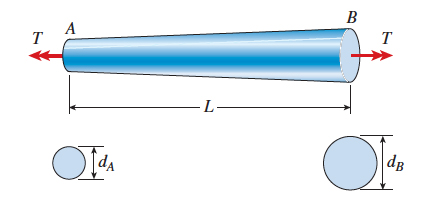

**Solution 3**

First evaluate $d_A$ limited by $\tau_{\text{max,all}}$. This is done by considering the shear stress at location of the smallest diameter,

\begin{equation}
\tau_{\text{max}}= \frac{Tr}{I_P}
\end{equation}

where, 

\begin{equation}
I_P = \frac{\pi d_A^4}{32}
\end{equation}

Rearranging and solving for $d_A$,

\begin{equation}
d_A = \left(\frac{16T}{\pi \tau_{\text{max}}}\right)^\frac{1}{3}
\end{equation}

In [7]:
T = 2035 #(Nm)
tau_max = 52*10**6 #(N/m^2)
d_A1 = ((16*T)/(math.pi*tau_max))**(1/3) #(m)
print('The diameter d_A based on maximum allowable shear stress is {one} m'.format(one=round(d_A1,3)))

The diameter d_A based on maximum allowable shear stress is 0.058 m


To determine $d_A$ limited by angle of twist, we use the solution derived earlier in the lecture notes, 

\begin{equation}
\phi = \frac{32TL}{\pi G}\left(\frac{d_A^2 + d_Ad_B + d_B^2}{3d_A^3d_B^3}\right)
\end{equation}

If we make the substitution $d_B = 1.5d_A$, we can rearrange and solve for $d_A$,

\begin{equation}
\phi = \frac{32TL}{\pi G}\left(\frac{4.75}{10.125 d_A^4}\right)
\end{equation}

\begin{equation}
d_A = \left(\frac{32\times 4.75}{10.125}\frac{TL}{\pi G \phi}\right)^\frac{1}{4}
\end{equation}

In [8]:
phi_max = 3 #(degrees)
phi_max__rad = phi_max*math.pi/180 #(radians)
G = 27*10**9 #(N/m^2)
L = 2.4 #(m)

d_A2 = ((32*4.75/10.125)*((T*L)/(math.pi*G*phi_max__rad)))**0.25
print('The diameter d_A based on maximum allowable angle of twist is {one} m'.format(one=round(d_A2,3)))

#Test governing condition
if(d_A2>d_A1):
    print('3. The required diameter at A is {one} m, governed by the limiting angle of twist'.format(one=round(d_A2,3)))
else:
    print('3. The required diameter at A is {one} m, governed by the limiting shear stress'.format(one=round(d_A1,3)))

The diameter d_A based on maximum allowable angle of twist is 0.064 m
3. The required diameter at A is 0.064 m, governed by the limiting angle of twist


## Question 4

The solid circular bar shown below has a strain gauge orientated at $45^\circ$ to the longitudinal axis of the bar. When the bar is subject to a torque $T=1300\:Nm$, the strain gauge shows $\epsilon=331\times10^{-6}$. Determine the shear modulus for the bar.

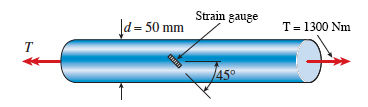

**Solution 4**

We know that the shear modulus is given by,

\begin{equation}
G = \frac{\tau}{\gamma}
\end{equation}

So we first determine the shear stress resulting from the applied torque.

In [9]:
d = 0.05 #(m)
T = 1300 #(Nm)
eps = 331*10**-6 #(unitless strain)
Ip = math.pi*d**4/32 #(m^4)
tau_max = T*(d/2)/Ip #(N/m^2)

We can not determine the shear strain $\gamma$ by recalling the relationship,

\begin{equation}
\epsilon = \frac{\gamma}{2}
\end{equation}

In [10]:
gamma = 2*eps 
G = tau_max/gamma #(N/m^2)
print('4. The shear modulus is {one} kN/mm^2'.format(one=round(G*10**-9)))

4. The shear modulus is 80 kN/mm^2


## Answers

1. $50.3 \:N/mm^2$, $0.14^\circ$
2. $348.13\: Nm$
3. $0.064 \:m$
4. $80 \:kN/mm^2$